Описание проекта

Это учебный проект Яндекс.Практикума. К сожалению, не было достаточно данных, чтобы дать содержательные рекомендации для маркетологов, пришлось самому додумывать ТЗ :). В конце нужно было проверить несколько гипотез о равенстве средних - такое задание, хотя по бизнес-логике не совсем ясно, зачем нужно было это делать.

"Мы работаем в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков»".

Описание данных

* 		Name — название игры
* 		Platform — платформа
* 		Year_of_Release — год выпуска
* 		Genre — жанр игры
* 		NA_sales — продажи в Северной Америке (миллионы проданных копий)
* 		EU_sales — продажи в Европе (миллионы проданных копий)
* 		JP_sales — продажи в Японии (миллионы проданных копий)
* 		Other_sales — продажи в других странах (миллионы проданных копий)
* 		Critic_Score — оценка критиков (максимум 100)
* 		User_Score — оценка пользователей (максимум 10)
* 		Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

#### Оглавление

1. [Знакомство с данными и предобработка](#preprocessing)
2. [Исследовательский анализ данных](#eda)
3. [Портрет пользователя каждого региона](#portrait)
4. [Тестирование гипотез](#hypotheses)
5. [Общий вывод](#summary)

### Знакомство с данными и их предобработка.  <a id="preprocessing"></a>

In [ ]:
import pandas as pd
import numpy as np
!pip install missingno
import missingno as msno
import matplotlib.pyplot as plt
import warnings
import scipy.stats
import seaborn as sns
warnings.filterwarnings('ignore')
df = pd.read_csv('/datasets/games.csv')
df.head()

Defaulting to user installation because normal site-packages is not writeable


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Самые большие проблемы в данных - у приблизительно половины игр нет оценки критика, пользовательских оценок и рейтинга. Не будем заполнять пропуски, потому что это у нас нет достаточных данных и это может исказить выводы.

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера: </b>

Тут я с тобой полностью согласен - наше заполнение хоть и дает результат, но порой можно и обойтись без него (особенно, если данных для выводов хватает)

</div>


In [ ]:
df.columns = df.columns.str.lower()
df = df.dropna(subset=['year_of_release'])
df = df.reset_index(drop=True)
df['year_of_release'] = df['year_of_release'].astype('int32')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16446 entries, 0 to 16445
Data columns (total 11 columns):
name               16444 non-null object
platform           16446 non-null object
year_of_release    16446 non-null int32
genre              16444 non-null object
na_sales           16446 non-null float64
eu_sales           16446 non-null float64
jp_sales           16446 non-null float64
other_sales        16446 non-null float64
critic_score       7983 non-null float64
user_score         9839 non-null object
rating             9768 non-null object
dtypes: float64(5), int32(1), object(5)
memory usage: 1.3+ MB


Убрали игры, где не указан год выпуска - нам этот параметр важен, чтобы спрогнозировать продажи на 2017. Поменяли тип данных в years_of_release на целочисленный. Привели все названия столбцов к нижнему регистру.

<div class="alert alert-block alert-warning">
<b>Reviewer's comment:</b>

В именах игр встречается год, зачастую - это знание можно использовать =) В крайнем случае, для многих из них указана платформа - поскольку она имеет ограниченный срок жизни, можно предположить, что игра была выпущена вместе с основной массой на конкретной платформе.

Все эти предположения сейчас не так пагубно отразятся на датасете, как удаление - это ты уже знаешь с предыдущих спринтов ;)

</div>


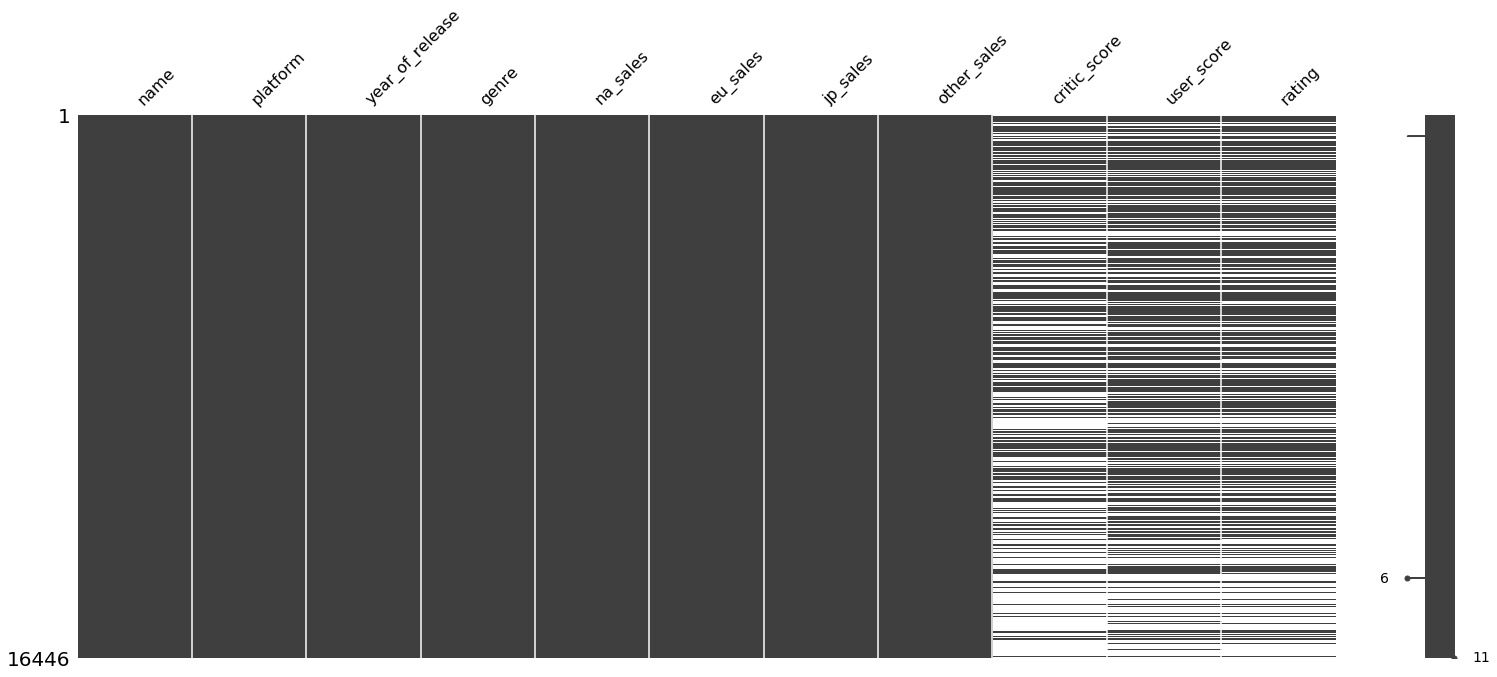

In [ ]:
msno.matrix(df);

Видим, что пропуски в столбцах critic_score, user_score и rating похожи.

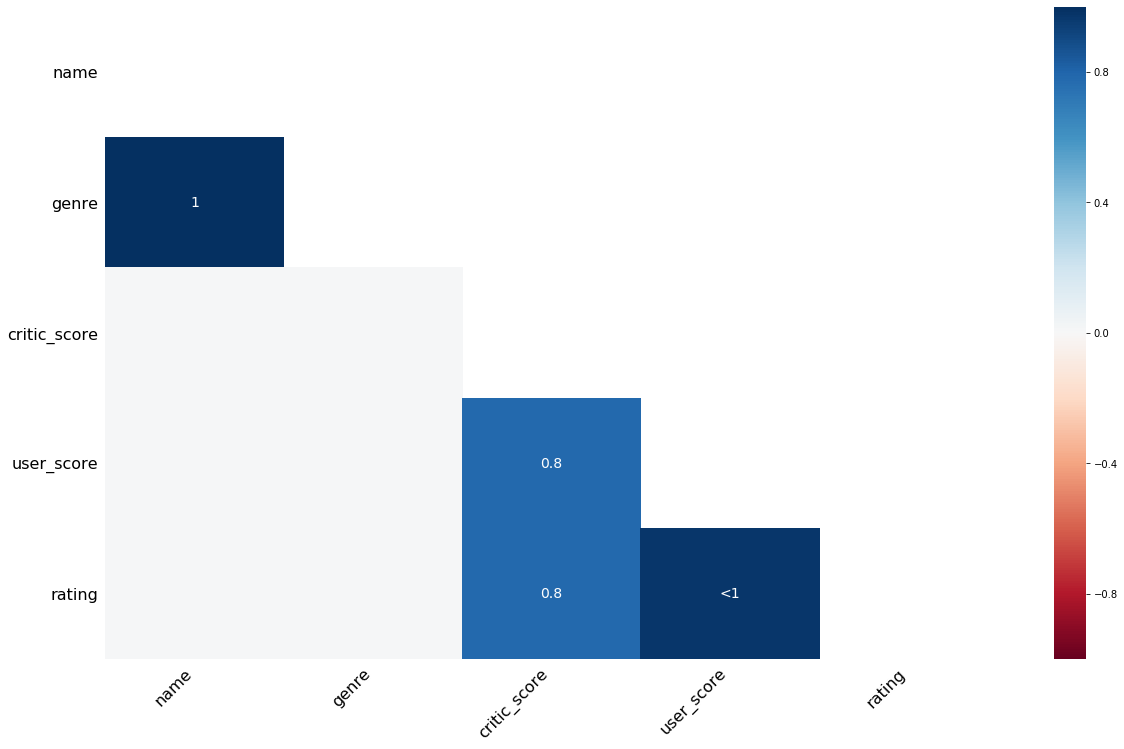

In [ ]:
msno.heatmap(df);

Почти везде, где нет пользовательского рейтинга, нет и рейтинга возрастного. Чуть менее связаны пропуски в рейтинге критиков и возрастном рейтинге, рейтинге пользовательском и рейтинге критиков. Скорее всего, все три параметра стали появляться у новых игр, поэтому так много пропусков.

In [ ]:
df.nunique()

name               11426
platform              31
year_of_release       37
genre                 12
na_sales             401
eu_sales             307
jp_sales             244
other_sales          155
critic_score          81
user_score            96
rating                 8
dtype: int64

Уникальных названий игр - 11559, тогда как всего их 16444. Видимо, разница объясняется мультиплатформенными играми.

In [ ]:
df.duplicated().sum()

0

Дубликатов не обнаружено.

In [ ]:
df['platform'].value_counts(normalize=True)

PS2     0.129332
DS      0.128968
PS3     0.079411
Wii     0.078195
X360    0.074912
PSP     0.072540
PS      0.072358
PC      0.058190
GBA     0.049313
XB      0.048826
GC      0.032956
3DS     0.031132
PSV     0.026085
PS4     0.023836
N64     0.019214
XOne    0.015019
SNES    0.014532
SAT     0.010519
WiiU    0.008938
2600    0.007053
NES     0.005959
GB      0.005898
DC      0.003162
GEN     0.001763
NG      0.000730
SCD     0.000365
WS      0.000365
3DO     0.000182
TG16    0.000122
PCFX    0.000061
GG      0.000061
Name: platform, dtype: float64

Аномальных значений и дубликатов в столбце platform, кажется, нет.

In [ ]:
df['year_of_release'].value_counts(normalize=True)

2008    0.086769
2009    0.086708
2010    0.076310
2007    0.072784
2011    0.069075
2006    0.061170
2005    0.057096
2002    0.050407
2003    0.047124
2004    0.046333
2012    0.039706
2015    0.036848
2014    0.035328
2013    0.033078
2016    0.030524
2001    0.029308
1998    0.023045
2000    0.021282
1999    0.020552
1997    0.017573
1996    0.015992
1995    0.013316
1994    0.007357
1993    0.003770
1981    0.002797
1992    0.002615
1991    0.002493
1982    0.002189
1986    0.001277
1983    0.001034
1989    0.001034
1987    0.000973
1990    0.000973
1988    0.000912
1984    0.000851
1985    0.000851
1980    0.000547
Name: year_of_release, dtype: float64

Аномальных значений в столбце years_of_release не замечено. Как видимо, в базе есть даже игры 1980-го года, а больше всего игр выпустилось в 2008 и 2009 гг.

In [ ]:
df['genre'].value_counts(normalize=True)

Action          0.201107
Sports          0.140234
Misc            0.104658
Role-Playing    0.090063
Shooter         0.078813
Adventure       0.078631
Racing          0.074556
Platform        0.053393
Simulation      0.052116
Fighting        0.050900
Strategy        0.040927
Puzzle          0.034602
Name: genre, dtype: float64

Аномальных значений в столбце genre не выявлено.

In [ ]:
df['rating'].value_counts(normalize=True)

E       0.401413
T       0.297400
M       0.157248
E10+    0.142609
EC      0.000819
K-A     0.000307
AO      0.000102
RP      0.000102
Name: rating, dtype: float64

Аномальных значений в столбце rating не выявлено. Подавляющее большинство игр имеют рейтинг: E, T, M, E10+

In [ ]:
df['user_score'].value_counts(normalize=True)

tbd    0.241488
7.8    0.032727
8      0.028966
8.2    0.028052
8.3    0.025612
         ...   
0.5    0.000203
0.3    0.000203
1.1    0.000203
9.7    0.000102
0      0.000102
Name: user_score, Length: 96, dtype: float64

tbd - игры без рейтинга. Видимо, которые не набрали достаточное количество отзывов. Поменяем эти значения на NaN, потому что по сути у этих игр оценки нет.

In [ ]:
df = df.replace('tbd', np.nan)
df['user_score'] = pd.to_numeric(df['user_score'], downcast="float")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16446 entries, 0 to 16445
Data columns (total 11 columns):
name               16444 non-null object
platform           16446 non-null object
year_of_release    16446 non-null int64
genre              16444 non-null object
na_sales           16446 non-null float64
eu_sales           16446 non-null float64
jp_sales           16446 non-null float64
other_sales        16446 non-null float64
critic_score       7983 non-null float64
user_score         7463 non-null float32
rating             9768 non-null object
dtypes: float32(1), float64(5), int64(1), object(4)
memory usage: 1.3+ MB


Поменяли на NaN 'tbd' в столбце user_score, тип данных в самом столбце поменяли на float.

In [ ]:
df['critic_score'].value_counts(normalize=True)

70.0    0.031567
71.0    0.031066
75.0    0.030064
80.0    0.029438
73.0    0.029312
          ...   
29.0    0.000376
20.0    0.000376
21.0    0.000125
13.0    0.000125
17.0    0.000125
Name: critic_score, Length: 81, dtype: float64

Аномальных значений в столбце critic_score не выявлено.

In [ ]:
df['na_sales'].describe()

count    16446.000000
mean         0.264089
std          0.818416
min          0.000000
25%          0.000000
50%          0.080000
75%          0.240000
max         41.360000
Name: na_sales, dtype: float64

Медианное значение столбца - 0.08 млн проданных копий. Аномалий не выявлено.

In [ ]:
df['eu_sales'].describe()

count    16446.000000
mean         0.145945
std          0.506696
min          0.000000
25%          0.000000
50%          0.020000
75%          0.110000
max         28.960000
Name: eu_sales, dtype: float64

Игры в Европе продаются хуже, чем в Северной Америке - медианное значение - 0.02 млн проданных копий. Аномалий не выявлено.

In [ ]:
df['jp_sales'].describe()

count    16446.000000
mean         0.078479
std          0.311082
min          0.000000
25%          0.000000
50%          0.000000
75%          0.040000
max         10.220000
Name: jp_sales, dtype: float64

В Японии больше половины игр не продают ни одной копии. Аномалий не выявлено.

In [ ]:
df['total_sales'] = df['jp_sales'] + df['eu_sales'] + df['na_sales']
df['total_sales'].describe()

count    16446.000000
mean         0.488513
std          1.423434
min          0.000000
25%          0.060000
50%          0.160000
75%          0.430000
max         74.090000
Name: total_sales, dtype: float64

Добавили столбец total_sales с общими продажами на всех рынках.

Итоги:
- Дубликатов в данных не обнаружено
- Около половины данных пропущено в столбцах critic_score, user_score и rating, не стали заполнять пропуски
- Значение tbd в столбце tbd заменили на NaN, чтобы можно было преобразовать столбец в тип float
- Преобразовали столбец year_of_release в целочисленный тип int_32
- Добавили столбец total_sales, где сложили продажи на всех трех рынках: na_sales, eu_sales и jp_sales

### Исследовательский анализ данных  <a id="eda"></a>

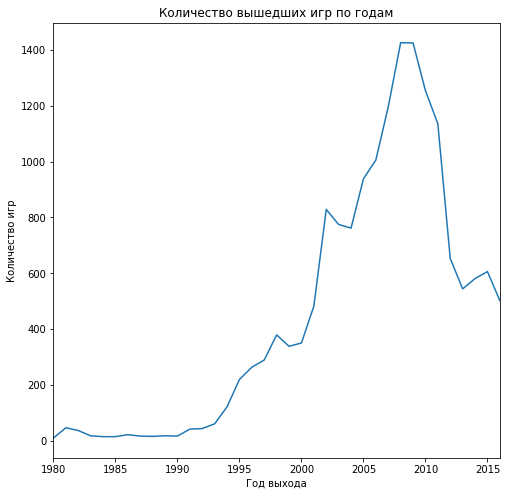

In [ ]:
plt.figure(figsize=(8,8))
df.groupby('year_of_release')['name'].count().plot()
plt.title('Количество вышедших игр по годам')
plt.xlabel('Год выхода')
plt.ylabel('Количество игр')
plt.show();

Резкий рост количества вышедших игр с 2000 по 2010, потом идет постепенный спад.

In [ ]:
df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform
PS2     1043.09
X360     876.36
Wii      813.47
PS3      796.75
DS       743.74
PS       686.89
GBA      305.27
PS4      265.79
PSP      248.77
GB       246.27
NES      245.74
3DS      244.54
XB       243.09
PC       233.88
N64      213.70
SNES     196.82
GC       191.60
XOne     145.05
2600      85.64
WiiU      76.24
PSV       47.38
SAT       33.52
GEN       29.80
DC        15.68
SCD        1.81
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64

Самые популярные платформы по вышедшим играм: PS2, X360, Wii, PS3, DS. Ниже посмотрим, как менялись продажи по самым популярным платформам год от года.

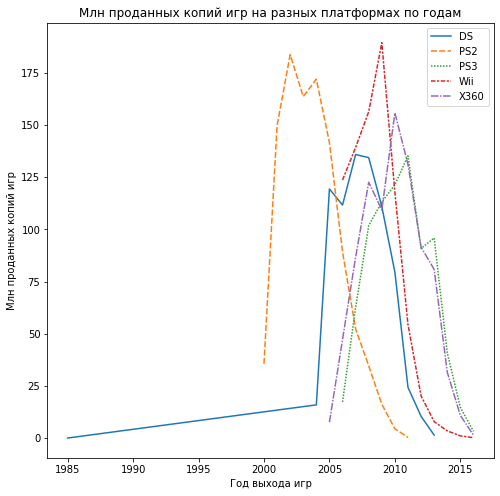

In [ ]:

plt.figure(figsize=(8,8))
platforms = df[df['platform'].isin(['PS2', 'X360', 'Wii', 'PS3', 'DS'])].pivot_table(index=['year_of_release'], columns='platform', values='total_sales', aggfunc='sum')
sns.lineplot(data = platforms, hue='platform')
plt.title('Млн проданных копий игр на разных платформах по годам')
plt.xlabel('Год выхода игр')
plt.ylabel('Млн проданных копий игр')
plt.show()

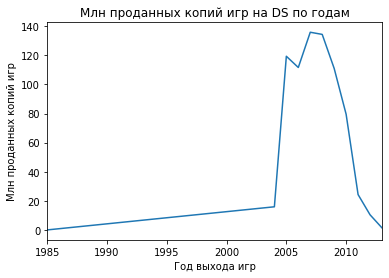

In [ ]:
df[df['platform'] == 'DS'].groupby('year_of_release')['total_sales'].sum().plot()
plt.title('Млн проданных копий игр на DS по годам')
plt.xlabel('Год выхода игр')
plt.ylabel('Млн проданных копий игр')
plt.show()

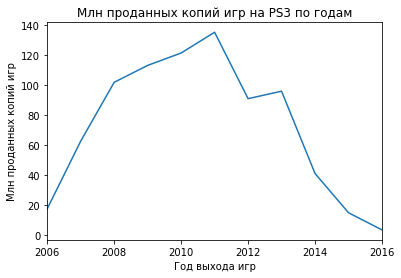

In [ ]:
df[df['platform'] == 'PS3'].groupby('year_of_release')['total_sales'].sum().plot()
plt.title('Млн проданных копий игр на PS3 по годам')
plt.xlabel('Год выхода игр')
plt.ylabel('Млн проданных копий игр')
plt.show()

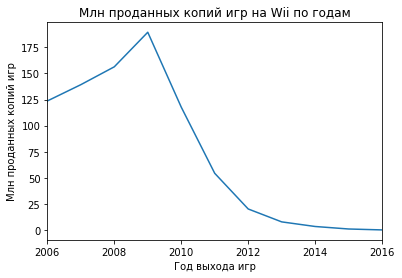

In [ ]:
df[df['platform'] == 'Wii'].groupby('year_of_release')['total_sales'].sum().plot()
plt.title('Млн проданных копий игр на Wii по годам')
plt.xlabel('Год выхода игр')
plt.ylabel('Млн проданных копий игр')
plt.show()

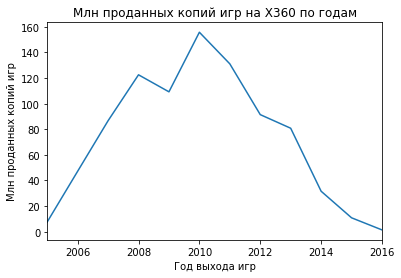

In [ ]:
df[df['platform'] == 'X360'].groupby('year_of_release')['total_sales'].sum().plot()
plt.title('Млн проданных копий игр на X360 по годам')
plt.xlabel('Год выхода игр')
plt.ylabel('Млн проданных копий игр')
plt.show()

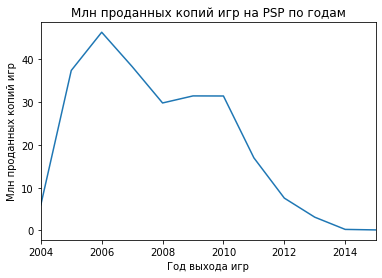

In [ ]:
df[df['platform'] == 'PSP'].groupby('year_of_release')['total_sales'].sum().plot()
plt.title('Млн проданных копий игр на PSP по годам')
plt.xlabel('Год выхода игр')
plt.ylabel('Млн проданных копий игр')
plt.show()

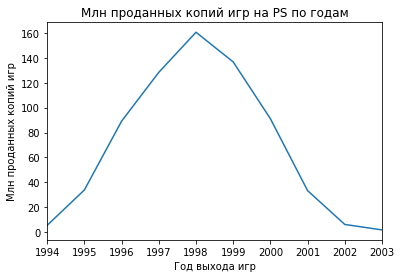

In [ ]:
df[df['platform'] == 'PS'].groupby('year_of_release')['total_sales'].sum().plot()
plt.title('Млн проданных копий игр на PS по годам')
plt.xlabel('Год выхода игр')
plt.ylabel('Млн проданных копий игр')
plt.show()

Срок жизни платформ - 7-10 лет. Для анализа оставим в нашем датафрейме данные только за 2011 - 2016. Более старые данные нам вряд ли помогут в прогнозе на 2017, потому что там слишком много продаж на устаревающих платформах.

In [ ]:
df2 = df[df['year_of_release'] > 2010].copy()

In [ ]:
df2.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform
PS3     380.75
X360    347.25
PS4     265.79
3DS     244.54
XOne    145.05
Wii      87.13
PC       86.58
WiiU     76.24
PSV      47.38
DS       36.14
PSP      28.00
PS2       0.35
Name: total_sales, dtype: float64

Лидируют по продажам за период 2011-2016 платформы X360, PS3, Wii, DS, PS4.

In [ ]:
df2[df2['year_of_release'] == 2016].groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform
PS4     59.01
XOne    23.91
3DS     14.50
PC       4.89
WiiU     4.25
PSV      4.10
PS3      3.23
X360     1.40
Wii      0.17
Name: total_sales, dtype: float64

В 2016-м году самые популярные платформы: PS4, XOne, 3DS, PC, WiiU, PSV. Посмотрим, какие из этих платформ растущие.

In [ ]:
pd.set_option('display.max_rows', 100)
df2.pivot_table(index=['platform', 'year_of_release'], values='total_sales', aggfunc='sum')

total_sales
platform year_of_release             
3DS      2011                   58.80
         2012                   48.77
         2013                   53.97
         2014                   41.75
         2015                   26.75
         2016                   14.50
DS       2011                   24.30
         2012                   10.42
         2013                    1.42
PC       2011                   29.70
         2012                   20.41
         2013                   11.27
         2014                   12.38
         2015                    7.93
         2016                    4.89
PS2      2011                    0.35
PS3      2011                  135.22
         2012                   90.87
         2013                   95.85
         2014                   40.88
         2015                   14.70
         2016                    3.23
PS4      2013                   22.12
         2014                   84.22
         2015                  100.44
         2016                   59.01
PSP      2011                   16.98
         2012                    7.56
         2013                    3.10
         2014                    0.24
         2015                    0.12
PSV      2011                    4.00
         2012                   13.65
         2013                    9.14
         2014                   10.56
         2015                    5.93
         2016                    4.10
Wii      2011                   54.37
         2012                   20.22
         2013                    7.87
         2014                    3.45
         2015                    1.05
         2016                    0.17
WiiU     2012                   16.30
         2013                   20.12
         2014                   20.35
         2015                   15.22
         2016                    4.25
X360     2011                  131.11
         2012                   91.45
         2013                   80.82
         2014                   31.61
         2015                   10.86
         2016                    1.40
XOne     2013                   17.21
         2014                   49.26
         2015                   54.67
         2016                   23.91

Все платформы сильно просели по продажам в 2016-м году. Из них рост в 2014 или 2015 показали XOne, PS4, PSV, PC, WiiU. 3DS падает, но не так сильно, как остальные. Эту платформу тоже оставим в перспективных. Таким образом 6 самых кассовых платформ 2016 оставим в списке самых перспективных.

In [ ]:
platforms_flag = ['PS4', 'XOne', '3DS', 'PC','WiiU', 'PSV']


: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.



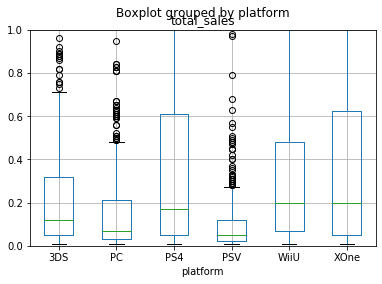

In [ ]:
pd.reset_option('all');
df2.query('total_sales>0 and platform in @platforms_flag').boxplot(by='platform', column=['total_sales'])
plt.ylim(0,1)
plt.show;

Медиана и разброс значений по проданным копиям на платформах PS4, WiiU, XOne - похожи. Видимо, эти платформы отвечают за бОльшую часть продаж. На 3DS медианное количество проданных копий в 2 раза меньше, чем у лидеров. Хуже всего в среднем продаются игры на PC и PSV.

0.3295378755676027

0.03367157972510265

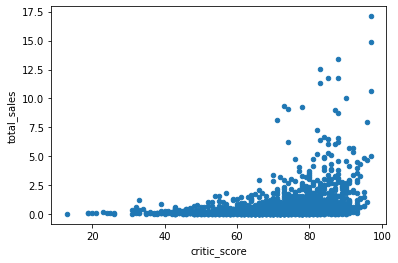

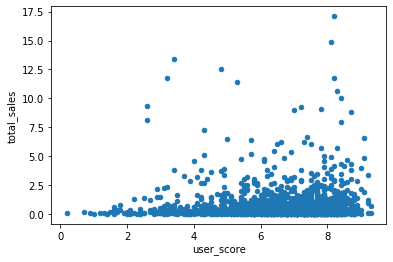

In [ ]:
df2.plot.scatter('critic_score', 'total_sales');
df2.plot.scatter('user_score', 'total_sales');
display(df2['critic_score'].corr(df2['total_sales']))
display(df2['user_score'].corr(df2['total_sales']))

Корреляция между оценкой критиков и продажами игры по всем платформам низкая. Пользовательские оценки почти никак не коррелируют с продажами игр в целом на всех платформах.

0.03367157972510265

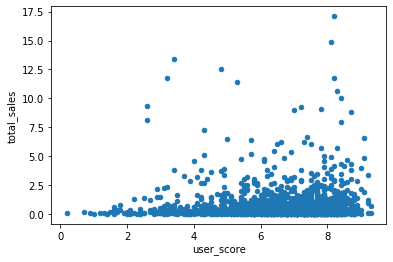

In [ ]:
df2.plot.scatter('user_score', 'total_sales');
df2['user_score'].corr(df2['total_sales'])

Корреляция между пользовательскими оценками и продажами игры - еще ниже, почти не наблюдается.

0.4058867746520127

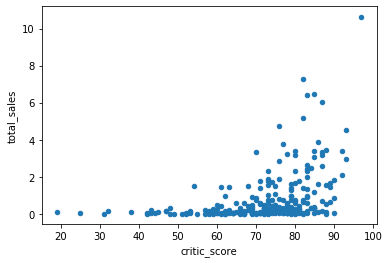

In [ ]:
df2.query('platform == "PS4"').plot.scatter('critic_score', 'total_sales');
df2.query('platform == "PS4"')['critic_score'].corr(df2.query('platform == "PS4"')['total_sales'])

Есть средняя корреляция между оценками критикова и продажами игр на платформе PS4. Возможно, это объясняется тем, что платформа новая, поэтому оценки критиков больше влияют на продажи игр для нее.

-0.031260535633320194

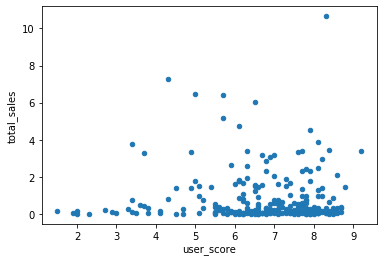

In [ ]:
df2.query('platform == "PS4"').plot.scatter('user_score', 'total_sales');
df2.query('platform == "PS4"')['user_score'].corr(df2.query('platform == "PS4"')['total_sales'])

Нет никакой корреляции между пользовательской оценкой и продажами игры на платформе PS4.

In [ ]:
df2.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

genre
Action          493.66
Shooter         354.37
Role-Playing    225.95
Sports          208.27
Misc            127.01
Platform         80.48
Racing           78.20
Fighting         60.25
Simulation       46.73
Adventure        40.79
Strategy         20.28
Puzzle            9.21
Name: total_sales, dtype: float64

Больше всего продано игр жанров action, shooter, role-playing, sports и misc.

In [ ]:
df2.groupby('genre')['total_sales'].median().sort_values(ascending=False)

genre
Shooter         0.360
Sports          0.190
Platform        0.170
Fighting        0.150
Role-Playing    0.140
Racing          0.135
Misc            0.120
Action          0.120
Simulation      0.100
Strategy        0.070
Puzzle          0.040
Adventure       0.030
Name: total_sales, dtype: float64

Топ-5 жанров по медианным продажам: shooter, sports, platform, fighting и role-playing. Жанров platform и fighting нет в топе по общим продажам: по всей видимости, в этих жанрах больше "крепких середнячков", тогда как в misc и action - много хитов.

Выводы:

- Самые популярные платформы по продажам за все время: PS2, DS, PS3, Wii, X360
- Срок жизни игровой платформы: 7-9 лет
- Взяли для анализа данные по играм за последние 5 лет: с 2011 по 2016
- В 2016-м году самые популярные платформы: PS4, XOne, 3DS, PC, WiiU, PSV. Все они просели по продажам в 2016 году: впрочем, как и весь рынок. Их будем считать самыми перспективными
- Пользовательские оценки почти никак не коррелируют с продажами. Оценки критиков коррелируют с продажами сильнее, но тоже слабо. Наблюдается средний уровень корреляции между оценками критиков и продажами на новой платформе PS4. Оценки критиков можно использовать, чтобы выводить в топ игры с высоким рейтингом.
- Топ-5 жанров по продажам на всех платформах: Action, Shooter, Role-Playing, Sports, Misc    

### Портрет пользователя каждого региона  <a id="portrait"></a>

In [ ]:
df2.groupby('platform')['na_sales'].sum().sort_values(ascending=False)

platform
X360    226.80
PS3     168.26
PS4     108.74
XOne     93.12
3DS      82.65
Wii      48.56
WiiU     38.10
PC       29.88
DS       18.86
PSV      12.47
PSP       2.19
PS2       0.13
Name: na_sales, dtype: float64

Топ-5 игровых платформ по количеству проданных игр в Северной Америке: X360, PS3, PS4, XOne, 3DS.

In [ ]:
df2.groupby('platform')['eu_sales'].sum().sort_values(ascending=False)

platform
PS3     163.10
PS4     141.09
X360    117.10
3DS      61.27
PC       56.70
XOne     51.59
Wii      29.60
WiiU     25.13
PSV      13.07
DS        9.24
PSP       1.77
PS2       0.13
Name: eu_sales, dtype: float64

Топ-5 игровых платформ по количеству проданных игр в Европе: PS3, PS4, X360, 3DS, PC.

In [ ]:
df2.groupby('platform')['jp_sales'].sum().sort_values(ascending=False)

platform
3DS     100.62
PS3      49.39
PSP      24.04
PSV      21.84
PS4      15.96
WiiU     13.01
Wii       8.97
DS        8.04
X360      3.35
XOne      0.34
PS2       0.09
PC        0.00
Name: jp_sales, dtype: float64

Топ-5 игровых платформ по количеству проданных игр в Японии: DS, 3DS, PS3, PSP, Wii.

Видно, что PSV, PSP - платформы, которые более популярны в Японии, а PC - в Европе. PS3 и PS4 популярные везде. X360 популярна в Северной Америке и Европе, но не популярна в Японии.

In [ ]:
df2.groupby('genre')['na_sales'].sum().sort_values(ascending=False)

genre
Action          230.92
Shooter         194.43
Sports          108.70
Role-Playing     83.78
Misc             69.69
Platform         38.28
Racing           31.98
Fighting         31.63
Simulation       15.37
Adventure        14.76
Strategy          7.48
Puzzle            2.74
Name: na_sales, dtype: float64

In [ ]:
df2.groupby('genre')['eu_sales'].sum().sort_values(ascending=False)

genre
Action          199.12
Shooter         148.02
Sports           88.48
Role-Playing     62.30
Racing           40.58
Misc             39.72
Platform         30.07
Simulation       19.72
Fighting         16.24
Adventure        13.96
Strategy          8.02
Puzzle            3.56
Name: eu_sales, dtype: float64

In [ ]:
df2.groupby('genre')['jp_sales'].sum().sort_values(ascending=False)

genre
Role-Playing    79.87
Action          63.62
Misc            17.60
Fighting        12.38
Platform        12.13
Adventure       12.07
Shooter         11.92
Simulation      11.64
Sports          11.09
Racing           5.64
Strategy         4.78
Puzzle           2.91
Name: jp_sales, dtype: float64

Топ-5 игровых жанров по проданным играм в Северной Америке: Action, Shooter, Sports, Misc, Role-Playing
Топ-5 игровых жанров по проданным играм в Европе: Action, Shooter, Sports, Misc, Racing
Топ-5 игровых жанров по проданным играм в Японии: Role-Playing, Action, Misc, Sports, Adventure

Вкусы европейской и американской аудитории схожи: разве что в Северной Америке больше любят Role-playing, а в Европе - Racing. В Японии, как и в других регионах, любят Action, Misc и Sports. В Японии, в отличие от Европы и Северной Америки, предпочитают играть в Role-playing и Adventure игры.

In [ ]:
df2.groupby('rating')['na_sales'].sum().sort_values(ascending=False)

rating
M       308.45
E       170.17
E10+    117.72
T       109.31
EC        0.42
RP        0.00
Name: na_sales, dtype: float64

In [ ]:
df2.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)

rating
M       250.26
E       141.73
T        83.16
E10+     78.00
RP        0.03
EC        0.00
Name: eu_sales, dtype: float64

In [ ]:
df2.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)

rating
E       36.68
T       33.39
M       26.14
E10+    11.23
RP       0.00
EC       0.00
Name: jp_sales, dtype: float64

Во всех регионах почти все продажи игр приходятся на 4 рейтинга: E, M, T, E10+. В Японии чуть меньшая доля игр выпускается с рейтингом M, чуть бОльшая - с рейтингом T, чем в Америке и Европе.

Выводы:

- PSV, PSP - платформы, которые более популярны в Японии, а PC - в Европе. PS3 и PS4 популярные везде. X360 популярна в Северной Америке и Европе, но не популярна в Японии.
- Вкусы европейской и американской аудитории схожи: разве что в Северной Америке больше любят Role-playing, а в Европе - Racing. В Японии, как и в других регионах, любят Action, Misc и Sports. В Японии, в отличие от Европы и Северной Америки, предпочитают играть в Role-playing и Adventure игры.
- Во всех регионах почти все продажи игр приходятся на 4 рейтинга: E, M, T, E10+.

### Проверяем гипотезы  <a id="hypotheses"></a>

#### Нулевая гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Альтернативная гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC различаются. 
Возьмем alpha = 0.05. Для начала проверим разницу дисперсий с помощью теста Левена. Нулевая гипотеза: дисперсии двух совокупностей равны. Возьмем alpha = 0.05.

In [ ]:
user_score_pc = df2[df2['platform'] == 'PC']['user_score'].dropna().copy()
user_score_xbox = df2[df2['platform'] == 'XOne']['user_score'].dropna().copy()


print(scipy.stats.levene(user_score_pc, user_score_xbox))

LeveneResult(statistic=5.516322808950336, pvalue=0.01923865875280839)


Тест Левена дал P-value 0.019 < 0.05. Отвергаем нулевую гипотезу, дисперсии совокупностей различаются. Значит, будем использовать тест Стьюдента с параметром equal_var = False. Будем использовать ttest_ind, потому что размер выборки сильно превышает 50, а это значит, по центральной предельной теореме, что выборки средних будут нормально распределены.

In [ ]:
print(scipy.stats.ttest_ind(user_score_pc, user_score_xbox, equal_var = False))

Ttest_indResult(statistic=-0.5060650666413071, pvalue=0.6130723347617271)


Тест Стьюдента дал p-value 0.61 > 0.05. Не удалось опровергнуть нулевую гипотезу. Делаем вывод, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

#### Нулевая гипотеза: Средние пользовательские рейтинги жанров Action и Sports одинаковые. Альтернативная гипотеза: Средние пользовательские рейтинги жанров Action и Sports различаются.
Для начала проверим разницу дисперсий между с помощью теста Левена между пользовательскими рейтингами игр жанра Action и пользовательскими рейтингами игр жанра Sports. Нулевая гипотеза: дисперсии двух совокупностей равны.

In [ ]:
user_score_action = df2[df2['genre'] == 'Action']['user_score'].dropna().copy()
user_score_sports = df2[df2['genre'] == 'Sports']['user_score'].dropna().copy()


print(scipy.stats.levene(user_score_action, user_score_sports))

LeveneResult(statistic=18.398502063636926, pvalue=1.9840214487449692e-05)


P-value очень низкий, гипотезу отвергаем. Будем считать, что дисперсии двух совокупностей отличаются. Значит, будем использовать ttest_ind с параметром equal_var = False.

Нулевая гипотеза: Средние пользовательские рейтинги жанров Action и Sports одинаковые. Альтернативная гипотеза: Средние пользовательские рейтинги жанров Action и Sports различаются. 
Возьмем alpha = 0.05. Для проверки гипотезы воспользуемся ttest_ind, потому что выборка значительно больше 50.

In [ ]:
print(scipy.stats.ttest_ind(user_score_action, user_score_sports, equal_var = False))

Ttest_indResult(statistic=9.360735435655927, pvalue=8.285622552270594e-19)


P-value на порядки ниже значения альфа. Следовательно, нулевая гипотеза не верна - средние пользовательские рейтинги жанров Action и Sports различаются.

#### Вывод: Исследование показало, что средние пользовательские рейтинги жанров Action и Sports значимо различаются, а средние пользовательские рейтинги платформ Xbox One и PC значимо не различаются.

### Общие выводы:  <a id="summary"></a>

#### Рекомендации по планированию ассортимента и рекламной кампании:
- Можно увеличить бюджет на продвижение игр с высоким рейтингом критиков: есть незначительная (коэффициент Пирсона = 0.33) корреляция между оценками критиков и продажами игры
- Точно стоит больше денег тратить на продвижение игр на PS4 с высоким рейтингом критиков: корреляция выше (коэффициент Пирсона = 0.44), чем в целом по датасету.
- Пользовательские оценки не помогут спрогнозировать продажи: пользовательские оценки почти никак не коррелируют с продажами
- Стоить расширить рекламный бюджет на самых растущих и перспективных платформах, а на остальные - резко сократить. Самые перспективные платформы - PS4, XOne, 3DS, PC, WiiU, PSV, на них приходится около 90% всех продаж в 2016 гг.
- При планировании рекламных кампаний и игрового ассортимента важно учитывать региональные особенности. PSV, PSP - платформы, которые более популярны в Японии, а PC - в Европе. PS3 и PS4 популярные везде. X360 популярна в Северной Америке и Европе, но не популярна в Японии.
- Не стоит тратить деньги на рекламу игр с рейтингом RP и RC - продажи игр с этими рейтингами близки к нулю. Во всех регионах почти все продажи игр приходятся на 4 рейтинга: E, M, T, E10+

#### Общие выводы по датасету:
- Всего у 40-50% игр есть оценки критиков, возрастной рейтинг и оценки пользователей - пропуски заполнять не стали
- Продажи игр снизились почти на всех платформах в 2016 г.
- Срок жизни игровой платформы - 7-9 лет
- Необходимо поработать над разделами сайта, которые посвящена самым популярным игровым жанрам. Популярные жанры в Европе и Северной Америке одни: Action, Shooter, Sports, Misc. В Японии больше любят играть в жанр Role-playing
- Средние пользовательские рейтинги платформ Xbox One и PC значимо не различаются
- Средние пользовательские рейтинги жанров Action и Sports значимо различаются